In [ ]:
conda install pandas numpy seaborn matplotlib plotly scikit-learn scipy scipy.stats.contingency

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import datasets, model_selection, metrics
from scipy.stats.contingency import association
import scipy as sp

# Print a confirmation message
print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
#load data
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


# Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.
Crosstab Analysis:
Create a crosstab between the product category and the isBestSeller status.
Are there categories where being a best-seller is more prevalent?
Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.


### Part 1: Business-centric summary
Grocery is a category where a best-seller is more prevalent

In [13]:
# Create a crosstab between category and isBestSeller status
crosstab_best_seller_category = pd.crosstab(df['category'], df['isBestSeller']) #crosstab_result

#make a copy of original crosstab_best_seller_category
crosstab_best_seller_category_prop = crosstab_best_seller_category.copy()

# Calculate the proportion of best-sellers for each category
crosstab_best_seller_category_prop['best_seller_proportion'] = crosstab_best_seller_category[True] / (crosstab_best_seller_category[True] + crosstab_best_seller_category[False])

# Sort categories based on best-seller proportion in descending order
sorted_categories_by_best_seller_proportion = crosstab_best_seller_category_prop.sort_values(by='best_seller_proportion', ascending=False)

# Display the sorted categories
sorted_categories_by_best_seller_proportion[['best_seller_proportion']]
sorted_categories_by_best_seller_proportion

isBestSeller,False,True,best_seller_proportion
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


Statistical Tests:


2. Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.Categorical (incl. Discrete numerical) VS Categorical


In [17]:
from scipy.stats import chi2_contingency

# Chi-square test for 'category' and 'isBestSeller'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_best_seller_category)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

Conclusion:
Beetwen  :  P-value (0.0) < Significance Level (0.05)
Since the p-value is 0.0, which is less than 0.05, you reject the null hypothesis.
This indicates that there is statistically significant evidence to suggest that there is an association between 'category' and 'isBestSeller'.

3. Compute Cramér's V to understand the strength of association between best-seller status and category.
Visualizations:
Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [20]:
#step1: 
from scipy.stats.contingency import association
crosstab_best_seller_category = pd.crosstab(df['category'], df['isBestSeller']) 


# Now compute the association using the "cramer" method
cramer_v = association(crosstab_best_seller_category, method="cramer")

print("Cramer's V:", cramer_v)

Cramer's V: 0.1222829439760564


Cramer's V: 0.1222829439760564

In [64]:
#step2
degree_of_freedom = min(crosstab_best_seller_category.shape)-1
degree_of_freedom 

1

step3: look at the table

0.1222829439760564 =  the level of correlation between  best-seller status and category
degree of freedom - is min value between the total number of row and total number of columns
apply - 1 to this result and 

### Stacked and Grouped Bar Charts
Visualizes the frequency or proportion of categories between two categorical variables.

In [24]:
sorted_categories_by_best_seller_proportion.iloc[:5,:]

isBestSeller,False,True,best_seller_proportion
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339


In [67]:
top_categories = sorted_categories_by_best_seller_proportion.iloc[:10,:-1]
top_categories

isBestSeller,False,True
category,,
Grocery,9008,556
Smart Home Security & Lighting,98,6
Health & Personal Care,9017,552
Mobile Phone Accessories,248,11
Power & Hand Tools,8353,306
"Billiard, Snooker & Pool",241,8
Pet Supplies,9152,285
Home Brewing & Wine Making,239,7
Wind Instruments,243,7


<Axes: xlabel='category'>

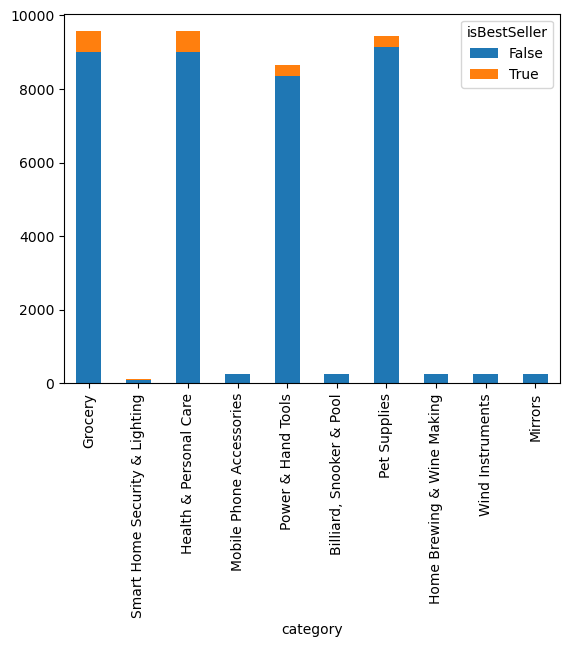

In [68]:
# Plotting a stacked bar chart for the 'crosstab_result' data
top_categories.plot(kind="bar", stacked=True)

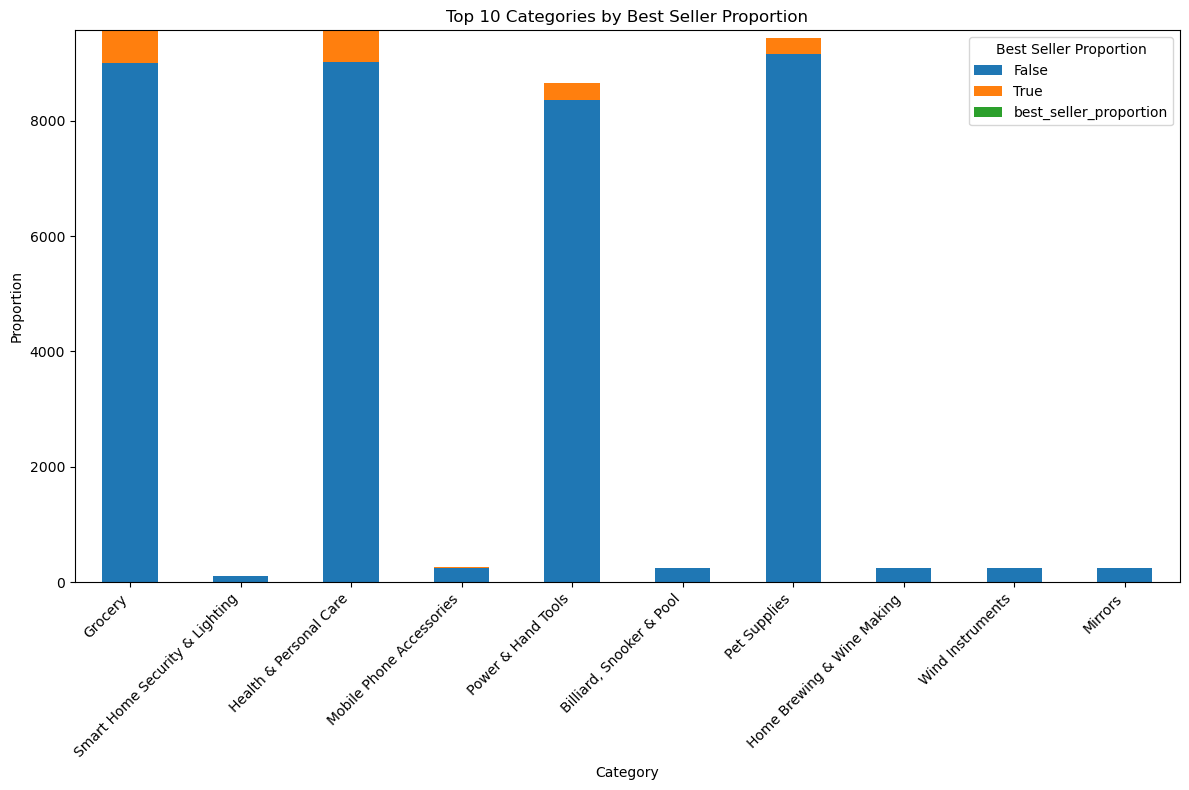

In [69]:
# ANOTHER WAY : Select only the top 10 categories fr better visualization
top_10_categories = sorted_categories_by_best_seller_proportion.head(10)

# Plotting a stacked bar chart for the 'crosstab_result' data
top_10_categories.plot(kind="bar", stacked=True, figsize=(12, 8))

# Add titles and labels for clarity
plt.title('Top 10 Categories by Best Seller Proportion')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Best Seller Proportion')
plt.tight_layout()

# Show the plot
plt.show()

<Axes: xlabel='category'>

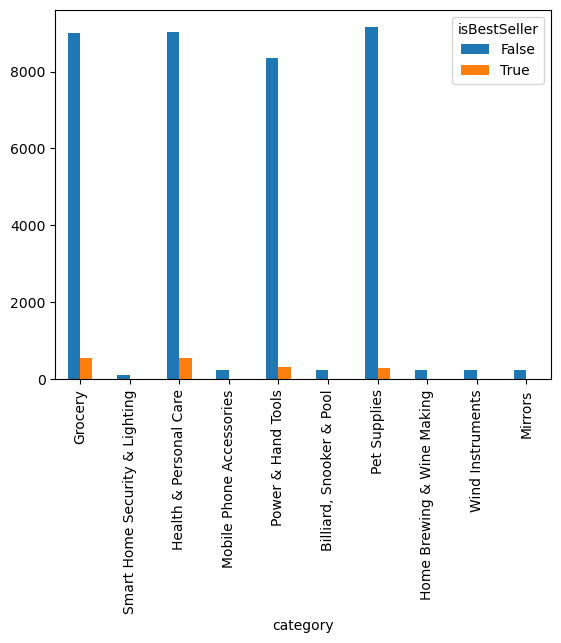

In [70]:
# Plotting a stacked bar chart for the 'crosstab_result' data
top_categories.plot(kind="bar", stacked=False)

In [41]:
top_10_categories

isBestSeller,False,True,best_seller_proportion
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
"Billiard, Snooker & Pool",241,8,0.032129
Pet Supplies,9152,285,0.030200
Home Brewing & Wine Making,239,7,0.028455
Wind Instruments,243,7,0.028000


<Axes: xlabel='isBestSeller', ylabel='category'>

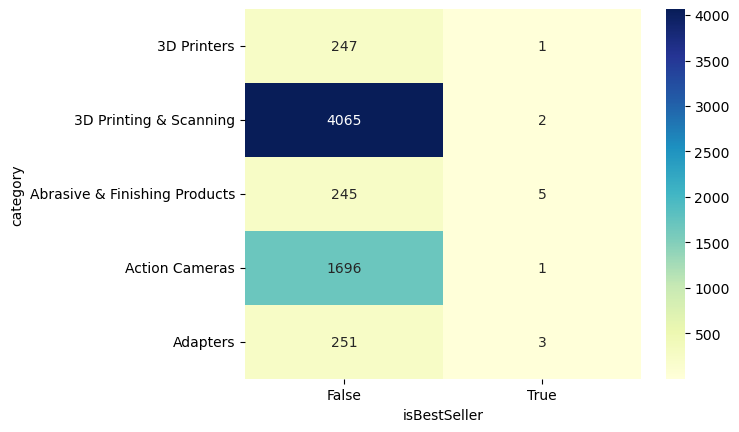

In [72]:
import seaborn as sns

# Plotting a heatmap for the 'crosstab_result' data, annotating each cell with the value, using the "YlGnBu" color map and formatting numbers as integers
top_5= crosstab_best_seller_category.head()
sns.heatmap(top_5 , annot=True, cmap="YlGnBu", fmt="d")

3D printer and  Cameras are less sellers

In [71]:
crosstab_best_seller_category

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


# Part 2: Exploring Product Prices and Ratings Across Categories and Brands
1. Objective: Investigate how different product categories influence product prices.
2. Preliminary Step: Remove outliers in product prices. For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.




In [46]:
import pandas as pd

# Calculate IQR for the price column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Check the shape of the data after removing outliers
df_no_outliers


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


3. Violin Plots:
Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.

/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_48590/3128502149.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top5, x='category', y='price', palette="coolwarm")


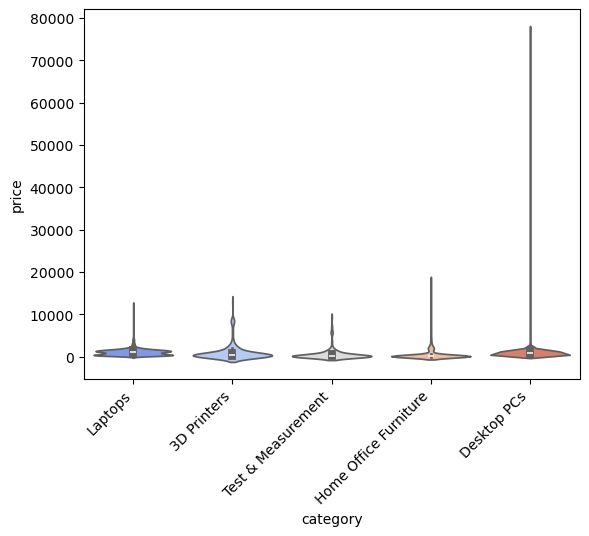

In [74]:
# Plotting a violin plot to visualize the distribution of 'SalePrice' for each 'MSZoning' category, using the "coolwarm" color palette
import matplotlib.pyplot as plt
import seaborn as sns


# Create violin plot
top_categories = df.groupby('category')['price'].mean().nlargest(5).index

# Filter the DataFrame to include only the top 5 categories
df_top5 = df[df['category'].isin(top_categories)]

# Create violin plot
sns.violinplot(data=df_top5, x='category', y='price', palette="coolwarm")

# Customizing the plot
plt.xticks(rotation=45, ha='right')
plt.show()

outcome of this violineplot - outliers in Desktop PCs
color is random,, no insights

4. Bar Charts:
Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.


/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_48590/276531739.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x='category', y='price', palette="coolwarm")


<Axes: xlabel='category', ylabel='price'>

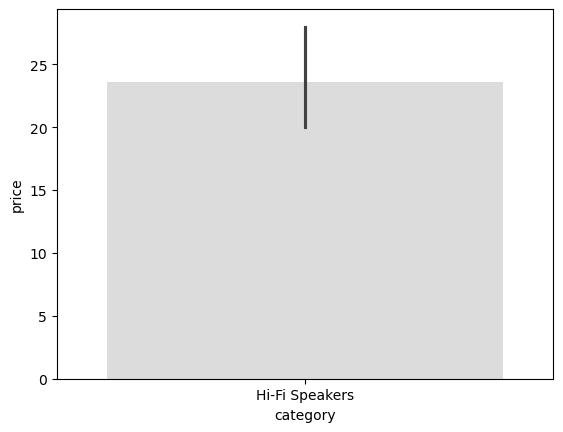

In [77]:
# Plotting a bar plot to visualize the average 'price' for each 'category' category, using the "coolwarm" color palette
df1 = df[df.isin(['categories_list'])]
sns.barplot(data=df1, x='category', y='price', palette="coolwarm")

In [75]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


5. Box Plots:
Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
business-centric summary

In [81]:
df_no_outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_48590/1195959389.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top10, x='category', y='stars', palette='coolwarm')


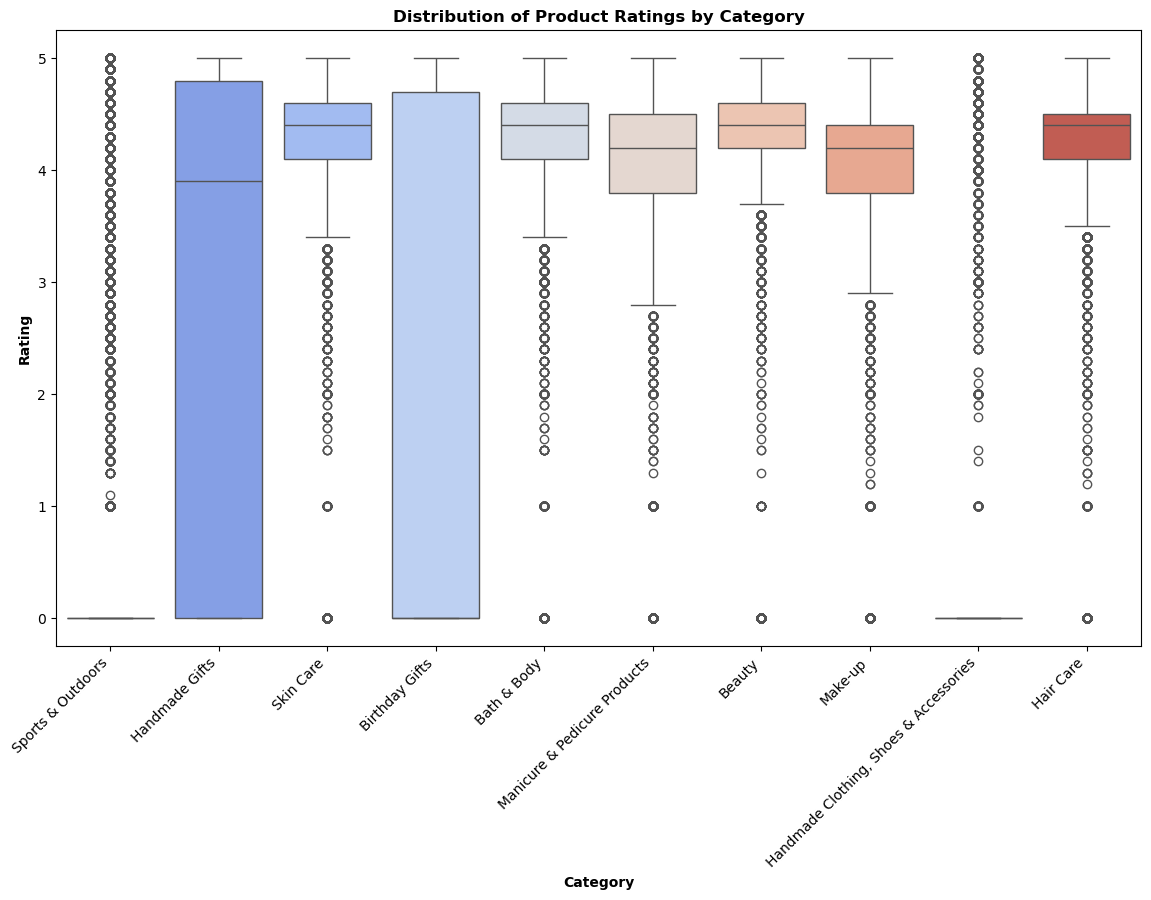

In [83]:
# Plotting a box plot to visualize the spread and outliers of 'stars' for each 'category' category, using the "coolwarm" color palette
# Identify the top 10 categories based on count
top_10_categories = df_no_outliers['category'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 categories
df_top10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

# Create the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top10, x='category', y='stars', palette='coolwarm')

# Customize the plot
plt.xlabel('Category', fontweight='bold')
plt.ylabel('Rating', fontweight='bold')
plt.title('Distribution of Product Ratings by Category', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

### Part 2: Business-centric summary

# Part 3: Investigating the Interplay Between Product Prices and Ratings
Objective: Analyze how product ratings (stars) correlate with product prices.
1. Correlation Coefficients:
Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?


In [ ]:
df_no_outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [ ]:
# Calculating the Pearson correlation coefficient between 'SalePrice' and 'GrLivArea' columns
# Calculate the correlation coefficient between price and rating
correlation_price_rating = round(df_no_outliers['price'].corr(df_no_outliers['stars']), 2)

# Display the correlation coefficient
correlation_price_rating

-0.08

Visualizations:
2. Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?


<Axes: xlabel='stars', ylabel='price'>

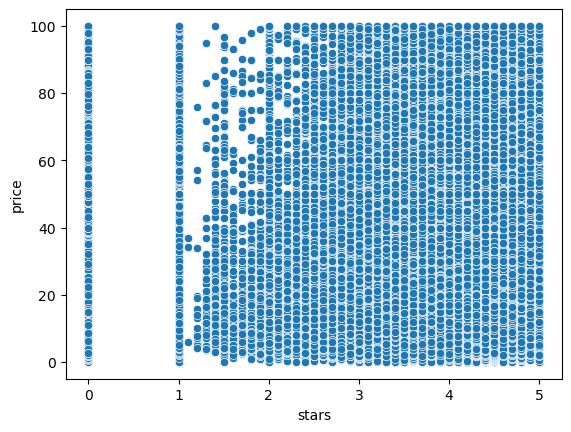

In [ ]:
# Plotting a scatter plot to visualize the relationship between 'GrLivArea' and 'SalePrice'
sns.scatterplot(data=df_no_outliers, x='stars', y='price')

3. Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.
Business-centric summary

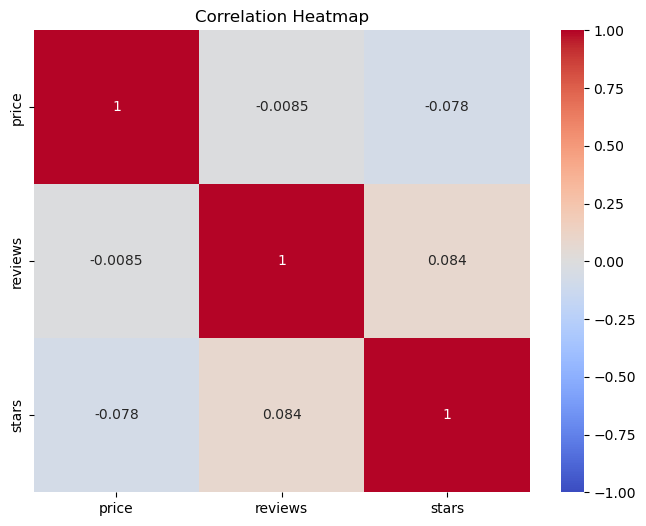

In [ ]:
# Correlation heatmap
correlation_matrix = df_no_outliers[['price', 'reviews', 'stars']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

### Part 3: Business-centric summary
there is no correlation stars/price, reviews/price
there is positive corellation reviews/stars